# Exercise M4.04

In this exercise, we will study the advantage of using regularization when dealing with correlated features.  
We will first create a regression dataset. This dataset will contain 2000 samples and 5 features from which only 2 features will be informative.

In [1]:
from sklearn.datasets import make_regression

data, target, coef = make_regression( n_samples=2_000,
                                    n_features=5,
                                    n_informative=2,
                                    shuffle=False,
                                    coef=True,
                                    random_state=0,
                                    noise=30)

When creating the dataset, `make_regression` returns the true coefficient used to generate the dataset. Let's plot this information.

Features 0     9.566665
Features 1    40.192077
Features 2     0.000000
Features 3     0.000000
Features 4     0.000000
dtype: float64

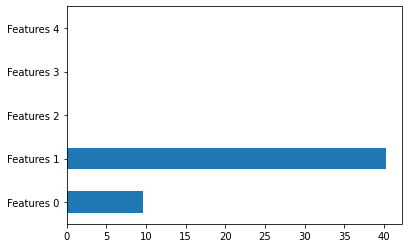

In [2]:
import pandas as pd

feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

Create a `LinearRegression` regressor and fit on the entire dataset and check the value of the coefficients. Are the  coefficients of the linear regressor close to the coefficients used to generate the dataset?

In [3]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
model = linear_regression.fit(data, target)

In [4]:
model.coef_

array([10.89587004, 40.41128042, -0.20542454, -0.18954462,  0.11129768])

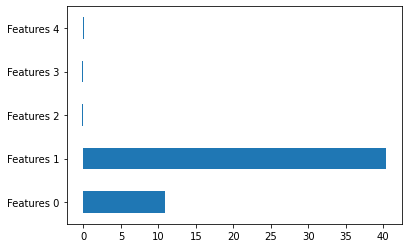

In [5]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()

We see that the coefficients are close to the coefficients used to generate the dataset. The dispersion is indeed caused by the noise injected during the dataset generation.

Now, we create the following new dataset:

In [23]:
import numpy as np

data = np.concatenate([data, data[:, [0, 1]], data[:, [0, 1]]], axis=1)

We fit again the linear regressor on this new dataset.

In [24]:
linear_regression = LinearRegression()
linear_regression.fit(data, target)
linear_regression.coef_

array([ 1.31388260e+12, -1.59473665e+14, -1.99218750e-01, -1.68457031e-01,
        9.52148438e-02, -6.56941302e+11,  4.12806902e+13, -6.56941302e+11,
        1.18192975e+14])

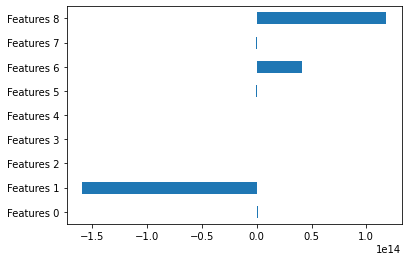

In [25]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()

We see that the coefficient values are far from what one could expect. By repeating the informative features, one would have expected these coefficients to be similarly informative.  
Instead, we see that some coefficients have a huge norm. It means that we try to solve an ill-posed mathematical problem. Finding coefficients in a linear regression involves inverting the matrix `np.dot(data.T, data)` which is not possible.

Now Let's create a ridge regressor and fit on the same dataset:

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(data, target)
ridge.coef_

array([ 3.6313933 , 13.46802113, -0.20549345, -0.18929961,  0.11117205,
        3.6313933 , 13.46802113,  3.6313933 , 13.46802113])

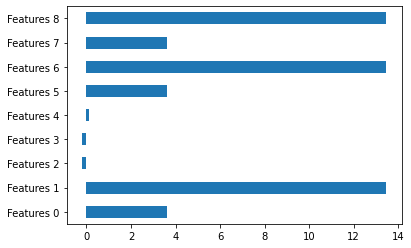

In [27]:
coef = pd.Series(ridge.coef_, index=feature_names)
_ = coef.plot.barh()

We see that the penalty applied on the weights give a better results: the values of the coefficients do not suffer from numerical issues. Indeed, the matrix to be inverted internally is `np.dot(data.T, data) + alpha * I`. Adding this penalty `alpha` allow the inversion without numerical issue.

<div class="alert alert-block alert-info">
<b>Tip:</b> <br>
    We always advise to use l2-penalized model instead of non-penalized model in practice. In scikit-learn, `LogisticRegression` applies such penalty by default. However, one needs to  use Ridge instead of `LineaRegression`</div>